In [3]:
import matplotlib.pyplot as plt
from numpy import pi as π
import numpy as np
from mpl_toolkits import mplot3d
import surf2stl

In [19]:
class Point:
    def __init__(self,x=1,y=1,z=1):
        self.x=x
        self.y=y
        self.z=z
        
    def plot(self):
        ax=plt.axes(projection ="3d")
        X,Y=np.meshgrid(self.x,self.y)
        Z=np.cos(np.pi/2*X)*np.exp(-Y**2)
        ax.plot_surface(X,Y,Z)
     


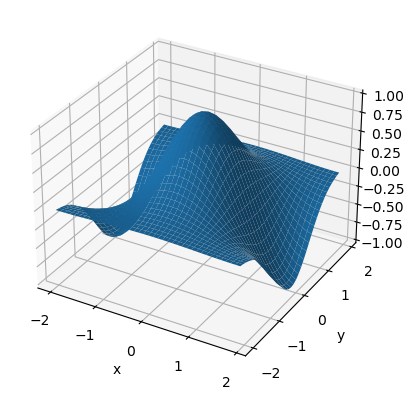

In [20]:
#ax.plot_surface(x,y,z)
a= Point(np.arange(-2,2,0.1),np.arange(-2,2,0.1))
a.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

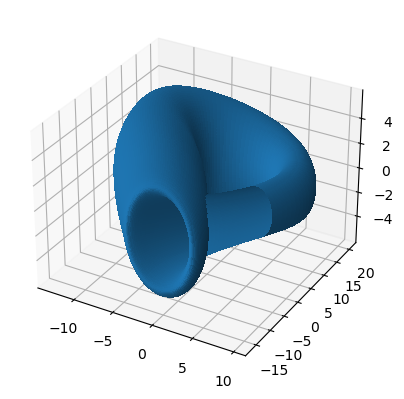

In [21]:
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.pyplot as plt
import numpy as np

cos = np.cos
sin = np.sin
sqrt = np.sqrt
pi = np.pi

def surf(u, v):
    
    half = (0 <= u) & (u < pi)
    r = 4*(1 - cos(u)/2)
    x = 6*cos(u)*(1 + sin(u)) + r*cos(v + pi)
    x[half] = (
        (6*cos(u)*(1 + sin(u)) + r*cos(u)*cos(v))[half])
    y = 16 * sin(u)
    y[half] = (16*sin(u) + r*sin(u)*cos(v))[half]
    z = r * sin(v)
    return x, y, z

u, v = np.linspace(0, 2*pi, 120), np.linspace(0, 2*pi, 120)
ux, vx =  np.meshgrid(u,v)
x, y, z = surf(ux, vx)

fig = plt.figure()
ax = plt.axes(projection = '3d')
plot = ax.plot_surface(x, y, z, rstride = 1, cstride = 1,
                       linewidth = 0, antialiased = False)


plt.show()


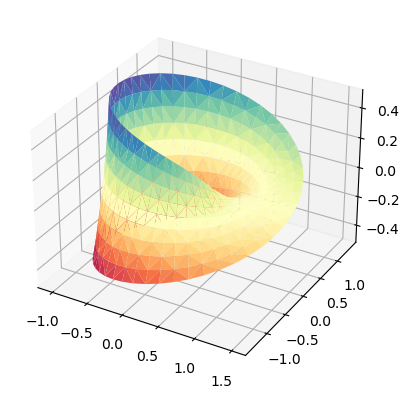

In [28]:
import stl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from stl import mesh

# u, v are parameterisation variables
u = (np.linspace(0, 2.0 * np.pi, endpoint=True, num=50) * np.ones((10, 1))).flatten()
v = np.repeat(np.linspace(-1, 1, endpoint=True, num=10), repeats=50).flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = (0.5 * v * np.sin(u / 2.0))

#X=x * np.linspace(1,6,500)
#Y=y * np.linspace(1,6,500)
#Z=z * np.linspace(1,6,500)


# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# The triangles in parameter space determine which x, y, z points are
# connected by an edge
mobius_polycollection = ax.plot_trisurf(x, y, z, triangles=tri.triangles,cmap=plt.cm.Spectral )






data = np.zeros(len(tri.triangles), dtype=mesh.Mesh.dtype)
mobius_mesh = mesh.Mesh(data, remove_empty_areas=False)
mobius_mesh.x[:] = x[tri.triangles]
mobius_mesh.y[:] = y[tri.triangles]
mobius_mesh.z[:] = z[tri.triangles]
mobius_mesh.save('mobius.stl')

#mobius_mesh.save('mobius.stl')